In [98]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

In [99]:
dd = pd.read_csv('../data/train.csv')
dd.epoch = pd.to_datetime(dd.epoch)
dd.epoch = dd.epoch.apply(datetime.timestamp)
dd.epoch = dd.epoch - np.min(dd.epoch)

In [40]:
%matplotlib notebook

In [97]:
def cn(n):
   c = y*np.exp(-1j*2*n*np.pi*time/period)
   return c.sum()/c.size

def f(x, Nh):
   f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*x/period) for i in range(1,Nh+1)])
   return f.sum()

period = 2*np.pi
Nh = 50
time = np.linspace(0, 3*period, 100)
y = np.sin(time)

y2 = np.array([f(t,50).real for t in time])
plt.figure(0)
plt.plot(time, y)
plt.plot(time, y2)

<IPython.core.display.Javascript object>

[7.83542077e-15 2.31301190e-14 7.19044024e-15 4.16498476e-15
 2.83390901e-14 5.00000000e-01 1.19802359e-14 5.00000000e-01
 1.33750924e-14 6.35265963e-15 1.31542077e-14 9.18160488e-15
 1.12807360e-14 7.86360438e-15 9.18427505e-15 1.80660534e-14
 5.00000000e-01 1.13772965e-14 5.00000000e-01 1.19499787e-14
 5.46321983e-15 4.78460751e-15 4.81021807e-15 4.28473757e-15
 4.26455135e-15 4.93211143e-15 1.65772025e-15 5.00000000e-01
 5.99143835e-15 5.00000000e-01 7.44323180e-15 5.75933777e-15
 9.04565614e-15 2.36466437e-15 2.95052768e-15 2.89990314e-15
 2.64778287e-15 4.38928168e-15 5.00000000e-01 2.99835854e-15
 5.00000000e-01 4.45376744e-15 1.04805156e-15 1.95049323e-15
 3.56557364e-16 1.18181099e-15 1.14766549e-15 6.30800119e-16
 1.10632610e-15 5.00000000e-01 1.45238062e-16 5.00000000e-01
 1.10632610e-15 6.30800119e-16 1.14766549e-15 1.18181099e-15
 3.56557364e-16 1.95049323e-15 1.04805156e-15 4.45376744e-15
 5.00000000e-01 2.99835854e-15 5.00000000e-01 4.38928168e-15
 2.64778287e-15 2.899903

<IPython.core.display.Javascript object>


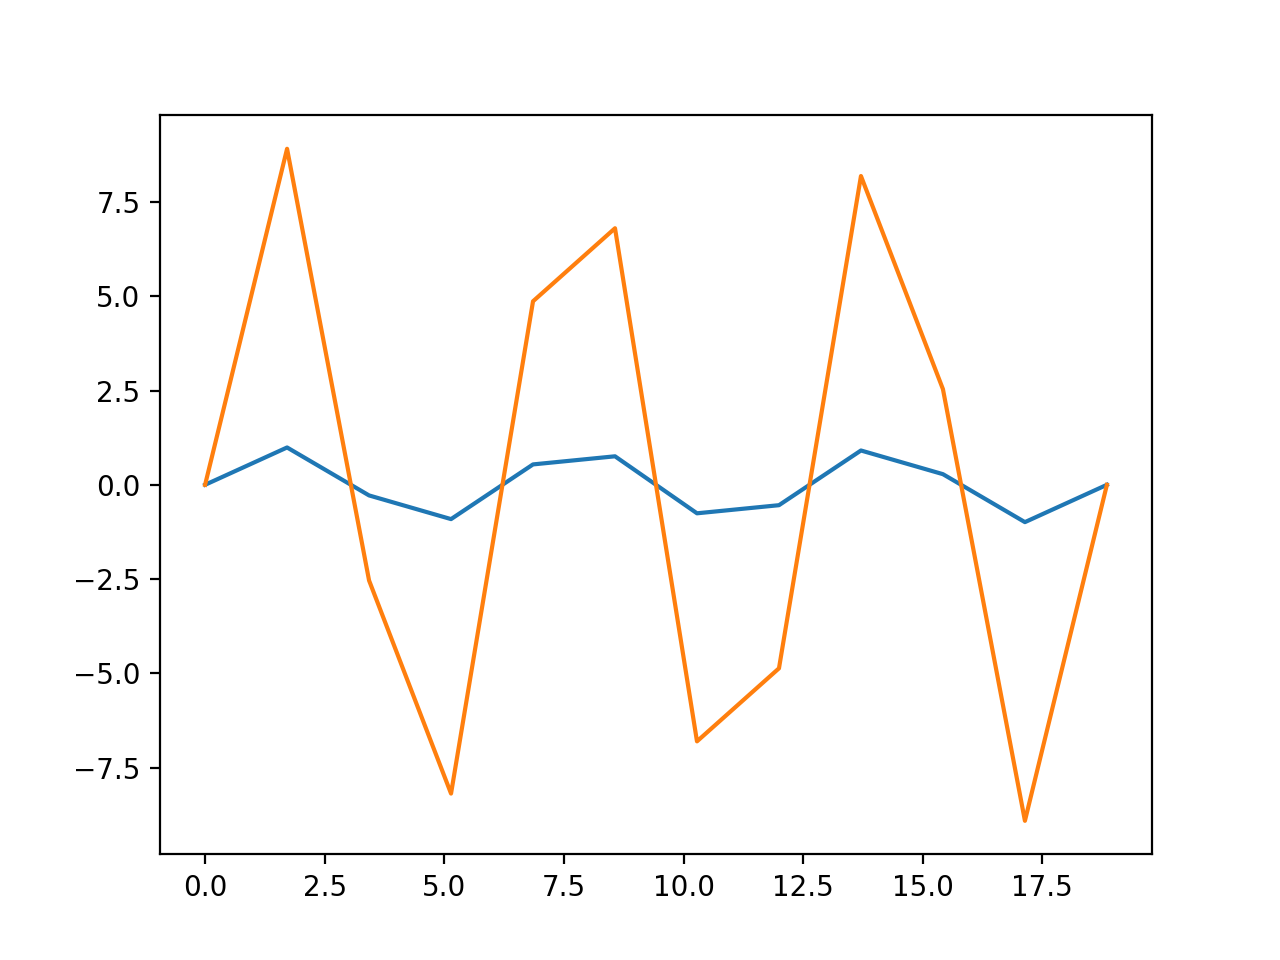

In [213]:
""" Precondition: the number of periods can't divide y.size-1"""
def cn(n, time, y, T):
    num_periods = (time[-1]-time[0]) / T
    delta_t = np.array([time[i]-time[i-1] for i in range(1, len(time))])
    coef = y[1:] * np.exp(-2j * np.pi * n * time[1:] / T) * delta_t
    return coef.sum() / (num_periods * T)

def coefficients(Nh, time, y, T):
    return np.array([cn(i, time, y, T) for i in range(-Nh, Nh+1)])

def evaluate(t, Nh, time, y, coefs, T):
    f = np.array([coefs[n+Nh] * np.exp(2j * np.pi * n * t / T) for n in range(-Nh, Nh+1)])
    return f.sum()

T = 2*np.pi
Nh = 50
nt = 3
sp = 12 
time = np.linspace(0, nt*T, sp)
y = np.sin(time)
coefs = coefficients(Nh, time, y, T)
print(abs(coefs))
y2 = np.array([evaluate(t, Nh, time, y, coefs, T).real for t in np.linspace(0, nt*T, sp)])

plt.figure(1)
plt.plot(time, y)
plt.plot(np.linspace(0, nt*T, sp), y2)

In [210]:
print(time)

[ 0.          0.45974527  0.91949053  1.3792358   1.83898107  2.29872633
  2.7584716   3.21821686  3.67796213  4.1377074   4.59745266  5.05719793
  5.5169432   5.97668846  6.43643373  6.896179    7.35592426  7.81566953
  8.27541479  8.73516006  9.19490533  9.65465059 10.11439586 10.57414113
 11.03388639 11.49363166 11.95337693 12.41312219 12.87286746 13.33261272
 13.79235799 14.25210326 14.71184852 15.17159379 15.63133906 16.09108432
 16.55082959 17.01057486 17.47032012 17.93006539 18.38981066 18.84955592]


In [212]:
nt * T / (sp-1)

0.4597452663789941